<a href="https://colab.research.google.com/github/ReneValenzuela/AI-ML-Batch2/blob/master/Netflix_20_Jan_DS_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('14yPPXxuOSV6CxbEds5eCbQzNso-5u5-u')

In [ ]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nflix = pd.read_csv('netflix_titles.csv')

In [ ]:
nflix.shape

(7787, 12)

In [ ]:
nflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
nflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
nflix.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [ ]:
nflix.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
nflix.shape

(7787, 12)

In [ ]:
nflix['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [ ]:
nflix['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [ ]:
nflix_shows = nflix[ nflix['type']=='TV Show' ]

In [ ]:
nflix_shows.shape

(2410, 12)

In [ ]:
nflix_movies = nflix[ nflix['type']=='Movie' ]

In [ ]:
nflix_movies.shape

(5377, 12)

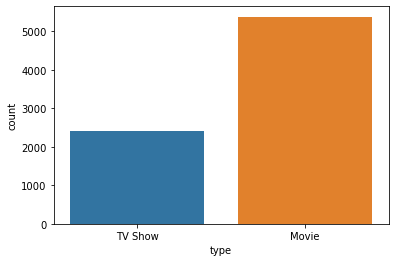

In [ ]:
# Analyse Movie vs TV Shows

sns.countplot(x='type', data=nflix);

There are comparitively more movies on Netflix than TV Shows.

# Which is the ideal month (as a producer of the movie) to release a movie?

In [ ]:
nflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
nflix['date_added'].isna().sum()

10

In [ ]:
nflix[nflix['date_added'].isna()]

show_id     type                                        title director  \
258     s259  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
549     s550  TV Show              Anthony Bourdain: Parts Unknown      NaN   
2263   s2264  TV Show                                      Frasier      NaN   
2288   s2289  TV Show                                      Friends      NaN   
2555   s2556  TV Show                              Gunslinger Girl      NaN   
3374   s3375  TV Show                                     Kikoriki      NaN   
3492   s3493  TV Show                          La Familia P. Luche      NaN   
3946   s3947  TV Show                                        Maron      NaN   
5137   s5138  TV Show                                 Red vs. Blue      NaN   
6065   s6066  TV Show                 The Adventures of Figaro Pho      NaN   

                                                   cast         country  \
258   Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
549                                    Anthony Bourdain   United States   
2263  Kelsey Grammer, Jane Leeves, David Hyde Pierce...   United States   
2288  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   
2555  Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...           Japan   
3374                                      Igor Dmitriev             NaN   
3492  Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...   United States   
3946  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
5137  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   United States   
6065  Luke Jurevicius, Craig Behenna, Charlotte Haml...       Australia   

     date_added  release_year rating    duration  \
258         NaN          2013  TV-MA   2 Seasons   
549         NaN          2018  TV-PG   5 Seasons   
2263        NaN          2003  TV-PG  11 Seasons   
2288        NaN          2003  TV-14  10 Seasons   
2555        NaN          2008  TV-14   2 Seasons   
3374        NaN          2010   TV-Y   2 Seasons   
3492        NaN          2012  TV-14   3 Seasons   
3946        NaN          2016  TV-MA   4 Seasons   
5137        NaN          2015     NR  13 Seasons   
6065        NaN          2015  TV-Y7   2 Seasons   

                                              listed_in  \
258            British TV Shows, TV Comedies, TV Dramas   
549                                          Docuseries   
2263                     Classic & Cult TV, TV Comedies   
2288                     Classic & Cult TV, TV Comedies   
2555                       Anime Series, Crime TV Shows   
3374                                           Kids' TV   
3492  International TV Shows, Spanish-Language TV Sh...   
3946                                        TV Comedies   
5137  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6065                              Kids' TV, TV Comedies   

                                            description  
258   Set during the Russian Revolution, this comic ...  
549   This CNN original series has chef Anthony Bour...  
2263  Frasier Crane is a snooty but lovable Seattle ...  
2288  This hit sitcom follows the merry misadventure...  
2555  On the surface, the Social Welfare Agency appe...  
3374  A wacky rabbit and his gang of animal pals hav...  
3492  This irreverent sitcom featues Ludovico, Feder...  
3946  Marc Maron stars as Marc Maron, who interviews...  
5137  This parody of first-person shooter games, mil...  
6065  Imagine your worst fears, then multiply them: ...

In [ ]:
nflix = nflix[nflix['date_added'].notna()]
# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

In [ ]:
nflix[nflix['date_added'].isna()]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

In [ ]:
nflix.head(2)

show_id     type title           director  \
0      s1  TV Show    3%                NaN   
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...

In [ ]:
s = "Hello, Darshan"
x = s.split(",")
print(s)
print(x)

Hello, Darshan
['Hello', ' Darshan']


In [ ]:
nflix['year'] = nflix['date_added'].apply( lambda x: x.split(',')[-1] )
nflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description   year  
0  In a future where the elite inhabit an island ...   2020  
1  After a devastating earthquake hits Mexico Cit...   2016  
2  When an army recruit is found dead, his fellow...   2018  
3  In a postapocalyptic world, rag-doll robots hi...   2017  
4  A brilliant group of students become card-coun...   2020

In [ ]:
# nflix['month'] = nflix['date_added'].apply( lambda x: x.split(',')[0] )
# nflix.head()

In [ ]:
# def ass_month(x):
#     return(x.split(',')[0].split(' ')[0])

In [ ]:
def ass_month(x):
    return(x.lstrip().split(' ')[0])

In [ ]:
nflix['month'] = nflix['date_added'].apply( ass_month )
nflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description   year     month  
0  In a future where the elite inhabit an island ...   2020    August  
1  After a devastating earthquake hits Mexico Cit...   2016  December  
2  When an army recruit is found dead, his fellow...   2018  December  
3  In a postapocalyptic world, rag-doll robots hi...   2017  November  
4  A brilliant group of students become card-coun...   2020   January

In [ ]:
nflix.groupby('year')['month'].value_counts().unstack()

month  April  August  December  February  January   July   June  March    May  \
year                                                                            
 2008    NaN     NaN       NaN       1.0      1.0    NaN    NaN    NaN    NaN   
 2009    NaN     NaN       NaN       NaN      NaN    NaN    NaN    NaN    1.0   
 2010    NaN     NaN       NaN       NaN      NaN    NaN    NaN    NaN    NaN   
 2011    NaN     NaN       NaN       NaN      NaN    NaN    NaN    NaN    1.0   
 2012    NaN     NaN       1.0       1.0      NaN    NaN    NaN    NaN    NaN   
 2013    NaN     1.0       2.0       NaN      NaN    NaN    NaN    1.0    NaN   
 2014    2.0     1.0       6.0       2.0      2.0    1.0    1.0    NaN    NaN   
 2015    5.0     2.0      23.0       4.0      1.0    8.0    7.0    5.0    7.0   
 2016   22.0    41.0      96.0      16.0     44.0   29.0   19.0   17.0   13.0   
 2017   95.0   115.0     118.0      84.0     72.0   80.0   95.0  140.0   88.0   
 2018  118.0   169.0     190.0      88.0    130.0  157.0   78.0  175.0  101.0   
 2019  171.0   145.0     222.0     159.0    162.0  169.0  175.0  179.0  159.0   
 2020  188.0   144.0     175.0     117.0    228.0  156.0  167.0  152.0  173.0   
 2021    NaN     NaN       NaN       NaN    117.0    NaN    NaN    NaN    NaN   

month  November  October  September  
year                                 
 2008       NaN      NaN        NaN  
 2009       1.0      NaN        NaN  
 2010       1.0      NaN        NaN  
 2011       NaN     11.0        1.0  
 2012       1.0      NaN        NaN  
 2013       2.0      3.0        2.0  
 2014       5.0      4.0        1.0  
 2015       4.0     15.0        7.0  
 2016      46.0     52.0       48.0  
 2017      88.0    131.0      119.0  
 2018     160.0    192.0      127.0  
 2019     272.0    204.0      136.0  
 2020     158.0    173.0      178.0  
 2021       NaN      NaN        NaN

In [ ]:
nflix.groupby('year')['month'].value_counts().unstack().fillna(0)

month  April  August  December  February  January   July   June  March    May  \
year                                                                            
 2008    0.0     0.0       0.0       1.0      1.0    0.0    0.0    0.0    0.0   
 2009    0.0     0.0       0.0       0.0      0.0    0.0    0.0    0.0    1.0   
 2010    0.0     0.0       0.0       0.0      0.0    0.0    0.0    0.0    0.0   
 2011    0.0     0.0       0.0       0.0      0.0    0.0    0.0    0.0    1.0   
 2012    0.0     0.0       1.0       1.0      0.0    0.0    0.0    0.0    0.0   
 2013    0.0     1.0       2.0       0.0      0.0    0.0    0.0    1.0    0.0   
 2014    2.0     1.0       6.0       2.0      2.0    1.0    1.0    0.0    0.0   
 2015    5.0     2.0      23.0       4.0      1.0    8.0    7.0    5.0    7.0   
 2016   22.0    41.0      96.0      16.0     44.0   29.0   19.0   17.0   13.0   
 2017   95.0   115.0     118.0      84.0     72.0   80.0   95.0  140.0   88.0   
 2018  118.0   169.0     190.0      88.0    130.0  157.0   78.0  175.0  101.0   
 2019  171.0   145.0     222.0     159.0    162.0  169.0  175.0  179.0  159.0   
 2020  188.0   144.0     175.0     117.0    228.0  156.0  167.0  152.0  173.0   
 2021    0.0     0.0       0.0       0.0    117.0    0.0    0.0    0.0    0.0   

month  November  October  September  
year                                 
 2008       0.0      0.0        0.0  
 2009       1.0      0.0        0.0  
 2010       1.0      0.0        0.0  
 2011       0.0     11.0        1.0  
 2012       1.0      0.0        0.0  
 2013       2.0      3.0        2.0  
 2014       5.0      4.0        1.0  
 2015       4.0     15.0        7.0  
 2016      46.0     52.0       48.0  
 2017      88.0    131.0      119.0  
 2018     160.0    192.0      127.0  
 2019     272.0    204.0      136.0  
 2020     158.0    173.0      178.0  
 2021       0.0      0.0        0.0

In [ ]:
l = [23,45,12]
print(l)
print(l[::-1])

[23, 45, 12]
[12, 45, 23]


In [ ]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'August', 'September', 'October', 'November', 'December'
]

In [ ]:
month_order = month_order[::-1]

In [ ]:
nflix.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order]

month  December  November  October  September  August   July   June    May  \
year                                                                         
 2008       0.0       0.0      0.0        0.0     0.0    0.0    0.0    0.0   
 2009       0.0       1.0      0.0        0.0     0.0    0.0    0.0    1.0   
 2010       0.0       1.0      0.0        0.0     0.0    0.0    0.0    0.0   
 2011       0.0       0.0     11.0        1.0     0.0    0.0    0.0    1.0   
 2012       1.0       1.0      0.0        0.0     0.0    0.0    0.0    0.0   
 2013       2.0       2.0      3.0        2.0     1.0    0.0    0.0    0.0   
 2014       6.0       5.0      4.0        1.0     1.0    1.0    1.0    0.0   
 2015      23.0       4.0     15.0        7.0     2.0    8.0    7.0    7.0   
 2016      96.0      46.0     52.0       48.0    41.0   29.0   19.0   13.0   
 2017     118.0      88.0    131.0      119.0   115.0   80.0   95.0   88.0   
 2018     190.0     160.0    192.0      127.0   169.0  157.0   78.0  101.0   
 2019     222.0     272.0    204.0      136.0   145.0  169.0  175.0  159.0   
 2020     175.0     158.0    173.0      178.0   144.0  156.0  167.0  173.0   
 2021       0.0       0.0      0.0        0.0     0.0    0.0    0.0    0.0   

month  April  March  February  January  
year                                    
 2008    0.0    0.0       1.0      1.0  
 2009    0.0    0.0       0.0      0.0  
 2010    0.0    0.0       0.0      0.0  
 2011    0.0    0.0       0.0      0.0  
 2012    0.0    0.0       1.0      0.0  
 2013    0.0    1.0       0.0      0.0  
 2014    2.0    0.0       2.0      2.0  
 2015    5.0    5.0       4.0      1.0  
 2016   22.0   17.0      16.0     44.0  
 2017   95.0  140.0      84.0     72.0  
 2018  118.0  175.0      88.0    130.0  
 2019  171.0  179.0     159.0    162.0  
 2020  188.0  152.0     117.0    228.0  
 2021    0.0    0.0       0.0    117.0

In [ ]:
nflix.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

year        2008   2009   2010   2011   2012   2013   2014   2015   2016  \
month                                                                      
December     0.0    0.0    0.0    0.0    1.0    2.0    6.0   23.0   96.0   
November     0.0    1.0    1.0    0.0    1.0    2.0    5.0    4.0   46.0   
October      0.0    0.0    0.0   11.0    0.0    3.0    4.0   15.0   52.0   
September    0.0    0.0    0.0    1.0    0.0    2.0    1.0    7.0   48.0   
August       0.0    0.0    0.0    0.0    0.0    1.0    1.0    2.0   41.0   
July         0.0    0.0    0.0    0.0    0.0    0.0    1.0    8.0   29.0   
June         0.0    0.0    0.0    0.0    0.0    0.0    1.0    7.0   19.0   
May          0.0    1.0    0.0    1.0    0.0    0.0    0.0    7.0   13.0   
April        0.0    0.0    0.0    0.0    0.0    0.0    2.0    5.0   22.0   
March        0.0    0.0    0.0    0.0    0.0    1.0    0.0    5.0   17.0   
February     1.0    0.0    0.0    0.0    1.0    0.0    2.0    4.0   16.0   
January      1.0    0.0    0.0    0.0    0.0    0.0    2.0    1.0   44.0   

year        2017   2018   2019   2020   2021  
month                                         
December   118.0  190.0  222.0  175.0    0.0  
November    88.0  160.0  272.0  158.0    0.0  
October    131.0  192.0  204.0  173.0    0.0  
September  119.0  127.0  136.0  178.0    0.0  
August     115.0  169.0  145.0  144.0    0.0  
July        80.0  157.0  169.0  156.0    0.0  
June        95.0   78.0  175.0  167.0    0.0  
May         88.0  101.0  159.0  173.0    0.0  
April       95.0  118.0  171.0  188.0    0.0  
March      140.0  175.0  179.0  152.0    0.0  
February    84.0   88.0  159.0  117.0    0.0  
January     72.0  130.0  162.0  228.0  117.0

In [ ]:
df = nflix.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year        2008   2009   2010   2011   2012   2013   2014   2015   2016  \
month                                                                      
December     0.0    0.0    0.0    0.0    1.0    2.0    6.0   23.0   96.0   
November     0.0    1.0    1.0    0.0    1.0    2.0    5.0    4.0   46.0   
October      0.0    0.0    0.0   11.0    0.0    3.0    4.0   15.0   52.0   
September    0.0    0.0    0.0    1.0    0.0    2.0    1.0    7.0   48.0   
August       0.0    0.0    0.0    0.0    0.0    1.0    1.0    2.0   41.0   
July         0.0    0.0    0.0    0.0    0.0    0.0    1.0    8.0   29.0   
June         0.0    0.0    0.0    0.0    0.0    0.0    1.0    7.0   19.0   
May          0.0    1.0    0.0    1.0    0.0    0.0    0.0    7.0   13.0   
April        0.0    0.0    0.0    0.0    0.0    0.0    2.0    5.0   22.0   
March        0.0    0.0    0.0    0.0    0.0    1.0    0.0    5.0   17.0   
February     1.0    0.0    0.0    0.0    1.0    0.0    2.0    4.0   16.0   
January      1.0    0.0    0.0    0.0    0.0    0.0    2.0    1.0   44.0   

year        2017   2018   2019   2020   2021  
month                                         
December   118.0  190.0  222.0  175.0    0.0  
November    88.0  160.0  272.0  158.0    0.0  
October    131.0  192.0  204.0  173.0    0.0  
September  119.0  127.0  136.0  178.0    0.0  
August     115.0  169.0  145.0  144.0    0.0  
July        80.0  157.0  169.0  156.0    0.0  
June        95.0   78.0  175.0  167.0    0.0  
May         88.0  101.0  159.0  173.0    0.0  
April       95.0  118.0  171.0  188.0    0.0  
March      140.0  175.0  179.0  152.0    0.0  
February    84.0   88.0  159.0  117.0    0.0  
January     72.0  130.0  162.0  228.0  117.0

In [ ]:
len(df.columns)

14

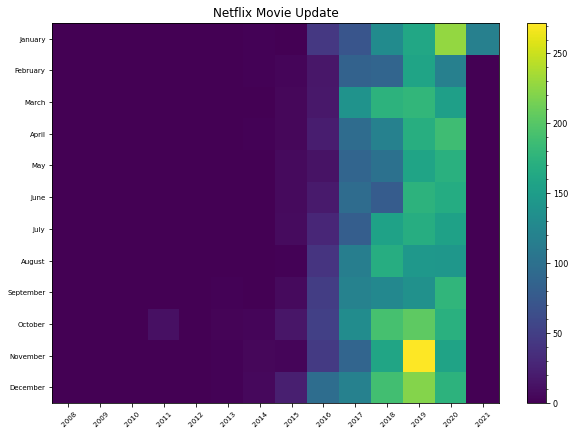

In [ ]:
plt.figure(figsize=(10,7))

plt.pcolor(df, linewidths = 2)

plt.xticks(np.arange(0.5, len(df.columns),1), df.columns, fontsize=7, rotation=45)

plt.yticks(np.arange(0.5, len(df.index),1), df.index, fontsize=7)

plt.title('Netflix Movie Update')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show();

# Rating Analysis

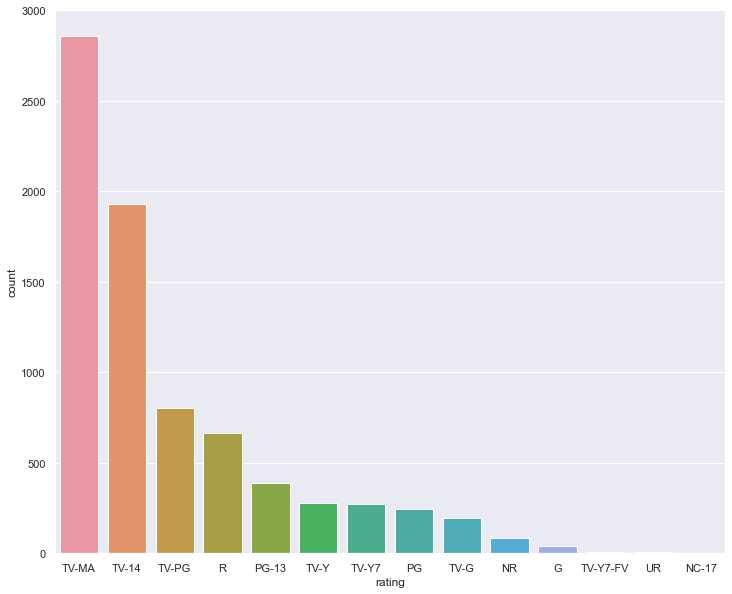

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
sns.countplot(x='rating', data=nflix, order=nflix['rating'].value_counts().index);

Max rating is for TV-MA i.e. rating assigned by TV Parental guidelines.

Second largest in TV-14 which stands for contents that may be inappropriate for children younger than 14 years of age.

Third is the ones that can be watched under parental guidance.

# Analyze IMDB ratings to get top rated movies on Netflix

In [ ]:
imdb_rat = pd.read_csv('IMDb ratings.csv', usecols=['weighted_average_vote'])

In [ ]:
imdb_rat.head()

weighted_average_vote
0                    5.9
1                    6.1
2                    5.8
3                    5.2
4                    7.0

In [ ]:
imdb_titles = pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])

In [ ]:
imdb_titles.head()

title  year                      genre
0                   Miss Jerry  1894                    Romance
1  The Story of the Kelly Gang  1906    Biography, Crime, Drama
2               Den sorte drøm  1911                      Drama
3                    Cleopatra  1912             Drama, History
4                    L'Inferno  1911  Adventure, Drama, Fantasy

In [ ]:
ratings = pd.DataFrame({
    'Title' : imdb_titles['title'],
    'Release Year' : imdb_titles['year'],
    'Rating' : imdb_rat.weighted_average_vote,
    'Genre' : imdb_titles.genre
})

In [ ]:
ratings.isna().sum()

Title           0
Release Year    0
Rating          0
Genre           0
dtype: int64

In [ ]:
ratings[ratings.duplicated()]

Empty DataFrame
Columns: [Title, Release Year, Rating, Genre]
Index: []

In [ ]:
ratings.shape

(85855, 4)

In [ ]:
ratings.head()

Title Release Year  Rating                      Genre
0                   Miss Jerry         1894     5.9                    Romance
1  The Story of the Kelly Gang         1906     6.1    Biography, Crime, Drama
2               Den sorte drøm         1911     5.8                      Drama
3                    Cleopatra         1912     5.2             Drama, History
4                    L'Inferno         1911     7.0  Adventure, Drama, Fantasy

In [ ]:
nflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description   year     month  
0  In a future where the elite inhabit an island ...   2020    August  
1  After a devastating earthquake hits Mexico Cit...   2016  December  
2  When an army recruit is found dead, his fellow...   2018  December  
3  In a postapocalyptic world, rag-doll robots hi...   2017  November  
4  A brilliant group of students become card-coun...   2020   January

In [ ]:
joint_data = ratings.merge(nflix, left_on='Title', right_on='title', how='inner')

In [ ]:
joint_data.head()

Title Release Year  Rating                       Genre show_id  \
0  Sherlock Holmes         1916     6.4                     Mystery   s5564   
1  Sherlock Holmes         1922     5.8              Drama, Mystery   s5564   
2  Sherlock Holmes         1932     5.7                       Drama   s5564   
3  Sherlock Holmes         1937     7.1      Comedy, Crime, Romance   s5564   
4  Sherlock Holmes         2009     7.6  Action, Adventure, Mystery   s5564   

    type            title     director  \
0  Movie  Sherlock Holmes  Guy Ritchie   
1  Movie  Sherlock Holmes  Guy Ritchie   
2  Movie  Sherlock Holmes  Guy Ritchie   
3  Movie  Sherlock Holmes  Guy Ritchie   
4  Movie  Sherlock Holmes  Guy Ritchie   

                                                cast  \
0  Robert Downey Jr., Jude Law, Rachel McAdams, M...   
1  Robert Downey Jr., Jude Law, Rachel McAdams, M...   
2  Robert Downey Jr., Jude Law, Rachel McAdams, M...   
3  Robert Downey Jr., Jude Law, Rachel McAdams, M...   
4  Robert Downey Jr., Jude Law, Rachel McAdams, M...   

                                             country       date_added  \
0  United States, Germany, United Kingdom, Australia  January 1, 2021   
1  United States, Germany, United Kingdom, Australia  January 1, 2021   
2  United States, Germany, United Kingdom, Australia  January 1, 2021   
3  United States, Germany, United Kingdom, Australia  January 1, 2021   
4  United States, Germany, United Kingdom, Australia  January 1, 2021   

   release_year rating duration                     listed_in  \
0          2009  PG-13  128 min  Action & Adventure, Comedies   
1          2009  PG-13  128 min  Action & Adventure, Comedies   
2          2009  PG-13  128 min  Action & Adventure, Comedies   
3          2009  PG-13  128 min  Action & Adventure, Comedies   
4          2009  PG-13  128 min  Action & Adventure, Comedies   

                                         description   year    month  
0  The game is afoot for an eccentric detective w...   2021  January  
1  The game is afoot for an eccentric detective w...   2021  January  
2  The game is afoot for an eccentric detective w...   2021  January  
3  The game is afoot for an eccentric detective w...   2021  January  
4  The game is afoot for an eccentric detective w...   2021  January

In [ ]:
joint_data.shape

(2737, 18)

In [ ]:
joint_data = joint_data.sort_values(by='Rating', ascending=False)
joint_data.head()

Title Release Year  Rating                      Genre  \
1000          Breakout         2019     9.0   Adventure, Comedy, Drama   
989           Innocent         2017     9.0                     Comedy   
398       Pulp Fiction         1994     8.9               Crime, Drama   
380   Schindler's List         1993     8.9  Biography, Drama, History   
1299         Inception         2010     8.8  Action, Adventure, Sci-Fi   

     show_id     type             title           director  \
1000   s1093  TV Show          Breakout                NaN   
989    s3009  TV Show          Innocent         Seren Yüce   
398    s5003    Movie      Pulp Fiction  Quentin Tarantino   
380    s5431    Movie  Schindler's List   Steven Spielberg   
1299   s2980    Movie         Inception  Christopher Nolan   

                                                   cast  \
1000  Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...   
989   Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...   
398   John Travolta, Samuel L. Jackson, Uma Thurman,...   
380   Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...   
1299  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...   

                            country        date_added  release_year rating  \
1000                            NaN      July 1, 2017          2010  TV-14   
989                          Turkey  January 23, 2019          2017  TV-MA   
398                   United States   January 1, 2019          1994      R   
380                   United States     April 1, 2018          1993      R   
1299  United States, United Kingdom   January 1, 2020          2010  PG-13   

      duration                                          listed_in  \
1000  1 Season                  International TV Shows, TV Dramas   
989   1 Season  Crime TV Shows, International TV Shows, TV Dramas   
398    154 min                Classic Movies, Cult Movies, Dramas   
380    195 min                             Classic Movies, Dramas   
1299   148 min    Action & Adventure, Sci-Fi & Fantasy, Thrillers   

                                            description   year    month  
1000  After losing her family in a suspicious car cr...   2017     July  
989   In a peaceful, rustic town, a retired officer ...   2019  January  
398   This stylized crime caper weaves together stor...   2019  January  
380   Oskar Schindler becomes an unlikely humanitari...   2018    April  
1299  In this mind-bending sci-fi thriller, a man ru...   2020  January

# Top 10 rated movies on Netflix

In [ ]:
joint_data['Title'].head(10)

1000                         Breakout
989                          Innocent
398                      Pulp Fiction
380                  Schindler's List
1299                        Inception
1667           Much Ado About Nothing
1972           Eh Janam Tumhare Lekhe
2667    Ani... Dr. Kashinath Ghanekar
227                          Gol Maal
734                       City of God
Name: Title, dtype: object

In [ ]:
# Lets look at a more classy way

import plotly.express as px

top_rated = joint_data[:10]

fig = px.sunburst(top_rated,
                 path=['title','country'],
                 values='Rating',
                  color='Rating'
                 )

fig.show();

In [ ]:
# Lets look at a more classy way

import plotly.express as px

top_rated = joint_data[:10]

fig = px.sunburst(top_rated,
                 path=['title','type','country'],
                 values='Rating',
                  color='Rating'
                 )

fig.show();

In [ ]:
# Countries with highest rated content

country_count = joint_data['country'].value_counts().sort_values(ascending=False)

In [ ]:
country_count.head()

United States     797
India             701
United Kingdom    107
Canada             56
Philippines        50
Name: country, dtype: int64

In [ ]:
country_count = pd.DataFrame(country_count)
country_count

country
United States                                           797
India                                                   701
United Kingdom                                          107
Canada                                                   56
Philippines                                              50
...                                                     ...
Uruguay, Argentina, Germany, Spain                        1
India, Pakistan                                           1
United Kingdom, United States, Germany, Denmark...        1
Netherlands, Denmark, South Africa                        1
China, United States                                      1

[299 rows x 1 columns]

In [ ]:
country_count.head(10)

country
United States                      797
India                              701
United Kingdom                     107
Canada                              56
Philippines                         50
Spain                               40
South Korea                         36
Indonesia                           35
France                              33
United Kingdom, United States       31

In [ ]:
topcountries = country_count[:10]
topcountries

country
United States                      797
India                              701
United Kingdom                     107
Canada                              56
Philippines                         50
Spain                               40
South Korea                         36
Indonesia                           35
France                              33
United Kingdom, United States       31

In [ ]:
list(topcountries.index)

['United States',
 'India',
 'United Kingdom',
 'Canada',
 'Philippines',
 'Spain',
 'South Korea',
 'Indonesia',
 'France',
 'United Kingdom, United States']

In [ ]:
list(topcountries['country'].values)

[797, 701, 107, 56, 50, 40, 36, 35, 33, 31]

In [ ]:
import plotly.express as px
data = dict(
    number=list(topcountries['country'].values),
    country=list(topcountries.index)
)

fig = px.funnel(data, x='number', y='country')
fig.show()

# year wise analysis

In [ ]:
nflix['release_year'].value_counts()

2018    1120
2017    1012
2019     996
2016     881
2020     868
        ... 
1966       1
1947       1
1959       1
1964       1
1925       1
Name: release_year, Length: 73, dtype: int64

In [ ]:
nflix['release_year'].value_counts().index[:15]

Int64Index([2018, 2017, 2019, 2016, 2020, 2015, 2014, 2013, 2012, 2010, 2011,
            2009, 2008, 2006, 2007],
           dtype='int64')

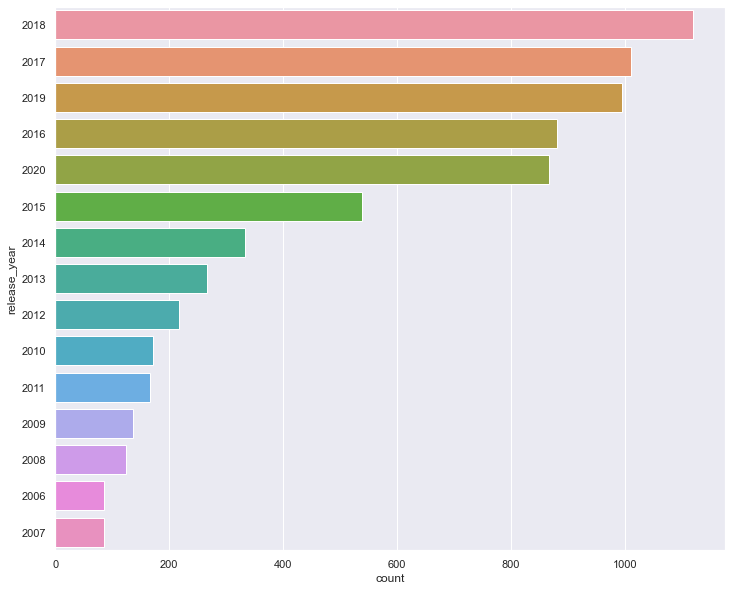

In [ ]:
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')

sns.countplot(y='release_year', data=nflix, order=nflix['release_year'].value_counts().index[:15]);

Maximum number of movies were released in 2018.

In [ ]:
nflix['country'].isna().sum()

506

In [ ]:
# Lets fill the na values in the country by 'Unknown'

nflix['country'].fillna('Unlknown', inplace=True)

In [ ]:
nflix['country'].isna().sum()

0

In [ ]:
nflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description   year     month  
0  In a future where the elite inhabit an island ...   2020    August  
1  After a devastating earthquake hits Mexico Cit...   2016  December  
2  When an army recruit is found dead, his fellow...   2018  December  
3  In a postapocalyptic world, rag-doll robots hi...   2017  November  
4  A brilliant group of students become card-coun...   2020   January

In [ ]:
cou = list(nflix['country'])
cou

['Brazil',
 'Mexico',
 'Singapore',
 'United States',
 'United States',
 'Turkey',
 'Egypt',
 'United States',
 'India',
 'India',
 'United States',
 'Poland, United States',
 'Mexico',
 'Thailand',
 'United States',
 'Nigeria',
 'Unlknown',
 'Norway, Iceland, United States',
 'India',
 'United Kingdom',
 'India',
 'India',
 'India',
 'India',
 'Japan',
 'United States',
 'United States',
 'South Korea',
 'Italy',
 'United States',
 'Canada',
 'Indonesia',
 'Indonesia',
 'United States',
 'Canada',
 'United States',
 'Romania',
 'Romania',
 'Unlknown',
 'Spain',
 'Turkey',
 'Iceland',
 'Turkey',
 'Nigeria',
 'United States',
 'Turkey',
 'United States',
 'United States',
 'South Africa, Nigeria',
 'France',
 'United States, South Africa',
 'South Korea',
 'Spain',
 'United States',
 'Portugal, Spain',
 'United States',
 'United States',
 'Indonesia',
 'United Kingdom',
 'India',
 'United States',
 'South Korea',
 'United States',
 'United States',
 'United States',
 'United States',
 '

In [ ]:
len(cou)

7777

In [ ]:
nflix['country'].value_counts()

United States                             2549
India                                      923
Unlknown                                   506
United Kingdom                             396
Japan                                      225
                                          ... 
Turkey, India                                1
United States, France, Serbia                1
France, United States, Canada                1
United Kingdom, United States, Morocco       1
United States, Norway, Canada                1
Name: country, Length: 682, dtype: int64

In [ ]:
countries={}

In [ ]:
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [ ]:
countries

{'Brazil': 1,
 'Mexico': 1,
 'Singapore': 1,
 'United States': 1,
 'Turkey': 1,
 'Egypt': 1,
 'India': 1,
 'Poland': 1,
 ' United States': 414,
 'Thailand': 1,
 'Nigeria': 1,
 'Unlknown': 1,
 'Norway': 2,
 ' Iceland': 4,
 'United Kingdom': 2,
 'Japan': 1,
 'South Korea': 1,
 'Italy': 2,
 'Canada': 4,
 'Indonesia': 1,
 'Romania': 3,
 'Spain': 1,
 'Iceland': 1,
 'South Africa': 1,
 ' Nigeria': 5,
 'France': 1,
 ' South Africa': 19,
 'Portugal': 2,
 ' Spain': 47,
 'Hong Kong': 1,
 ' China': 61,
 ' Singapore': 11,
 ' Germany': 107,
 'Argentina': 3,
 ' France': 153,
 ' Serbia': 4,
 'Germany': 3,
 'Denmark': 1,
 ' Poland': 10,
 'Kenya': 2,
 'New Zealand': 2,
 ' United Kingdom': 146,
 'Pakistan': 1,
 'Australia': 1,
 'China': 1,
 ' Hong Kong': 25,
 'Taiwan': 1,
 ' South Korea': 18,
 ' Japan': 50,
 ' Canada': 153,
 'Netherlands': 1,
 ' Denmark': 14,
 ' Netherlands': 20,
 'Philippines': 1,
 'United Arab Emirates': 2,
 'Iran': 1,
 ' Belgium': 71,
 ' Brazil': 9,
 'Israel': 1,
 ' Mexico': 31,
 'Ur

In [ ]:
countries.items()

dict_items([('Brazil', 1), ('Mexico', 1), ('Singapore', 1), ('United States', 1), ('Turkey', 1), ('Egypt', 1), ('India', 1), ('Poland', 1), (' United States', 414), ('Thailand', 1), ('Nigeria', 1), ('Unlknown', 1), ('Norway', 2), (' Iceland', 4), ('United Kingdom', 2), ('Japan', 1), ('South Korea', 1), ('Italy', 2), ('Canada', 4), ('Indonesia', 1), ('Romania', 3), ('Spain', 1), ('Iceland', 1), ('South Africa', 1), (' Nigeria', 5), ('France', 1), (' South Africa', 19), ('Portugal', 2), (' Spain', 47), ('Hong Kong', 1), (' China', 61), (' Singapore', 11), (' Germany', 107), ('Argentina', 3), (' France', 153), (' Serbia', 4), ('Germany', 3), ('Denmark', 1), (' Poland', 10), ('Kenya', 2), ('New Zealand', 2), (' United Kingdom', 146), ('Pakistan', 1), ('Australia', 1), ('China', 1), (' Hong Kong', 25), ('Taiwan', 1), (' South Korea', 18), (' Japan', 50), (' Canada', 153), ('Netherlands', 1), (' Denmark', 14), (' Netherlands', 20), ('Philippines', 1), ('United Arab Emirates', 2), ('Iran', 1)

In [ ]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        

In [ ]:
countries_fin

{'Brazil': 10,
 'Mexico': 32,
 'Singapore': 12,
 'UnitedStates': 415,
 'Turkey': 3,
 'Egypt': 6,
 'India': 35,
 'Poland': 11,
 'Thailand': 5,
 'Nigeria': 6,
 'Unlknown': 1,
 'Norway': 11,
 'Iceland': 5,
 'UnitedKingdom': 148,
 'Japan': 51,
 'SouthKorea': 19,
 'Italy': 33,
 'Canada': 157,
 'Indonesia': 5,
 'Romania': 5,
 'Spain': 48,
 'SouthAfrica': 20,
 'France': 154,
 'Portugal': 4,
 'HongKong': 26,
 'China': 62,
 'Germany': 110,
 'Argentina': 17,
 'Serbia': 7,
 'Denmark': 15,
 'Kenya': 4,
 'NewZealand': 15,
 'Pakistan': 3,
 'Australia': 37,
 'Taiwan': 4,
 'Netherlands': 21,
 'Philippines': 4,
 'UnitedArabEmirates': 17,
 'Iran': 4,
 'Belgium': 72,
 'Israel': 8,
 'Uruguay': 7,
 'Bulgaria': 5,
 'Chile': 9,
 'Russia': 9,
 'Mauritius': 1,
 'Lebanon': 8,
 'Colombia': 10,
 'Algeria': 2,
 'SovietUnion': 3,
 'Sweden': 25,
 'Malaysia': 4,
 'Ireland': 15,
 'Luxembourg': 11,
 'Finland': 11,
 'Austria': 4,
 'Peru': 6,
 'Senegal': 3,
 'Switzerland': 12,
 'Ghana': 1,
 'SaudiArabia': 3,
 'Armenia': 

In [ ]:
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}
countries_fin

{'UnitedStates': 415,
 'Canada': 157,
 'France': 154,
 'UnitedKingdom': 148,
 'Germany': 110,
 'Belgium': 72,
 'China': 62,
 'Japan': 51,
 'Spain': 48,
 'Australia': 37,
 'India': 35,
 'Italy': 33,
 'Mexico': 32,
 'HongKong': 26,
 'Sweden': 25,
 'Netherlands': 21,
 'SouthAfrica': 20,
 'CzechRepublic': 20,
 'SouthKorea': 19,
 'Argentina': 17,
 'UnitedArabEmirates': 17,
 'Denmark': 15,
 'NewZealand': 15,
 'Ireland': 15,
 'Singapore': 12,
 'Switzerland': 12,
 'Poland': 11,
 'Norway': 11,
 'Luxembourg': 11,
 'Finland': 11,
 'Brazil': 10,
 'Colombia': 10,
 'Greece': 10,
 'Chile': 9,
 'Russia': 9,
 'Israel': 8,
 'Lebanon': 8,
 'Jordan': 8,
 'Serbia': 7,
 'Uruguay': 7,
 'Qatar': 7,
 'Egypt': 6,
 'Nigeria': 6,
 'Peru': 6,
 'Hungary': 6,
 'Morocco': 6,
 'Thailand': 5,
 'Iceland': 5,
 'Indonesia': 5,
 'Romania': 5,
 'Bulgaria': 5,
 'WestGermany': 5,
 'Portugal': 4,
 'Kenya': 4,
 'Taiwan': 4,
 'Philippines': 4,
 'Iran': 4,
 'Malaysia': 4,
 'Austria': 4,
 '': 4,
 'Cambodia': 4,
 'Croatia': 4,
 'Tu

In [ ]:
countries_fin.keys()

dict_keys(['UnitedStates', 'Canada', 'France', 'UnitedKingdom', 'Germany', 'Belgium', 'China', 'Japan', 'Spain', 'Australia', 'India', 'Italy', 'Mexico', 'HongKong', 'Sweden', 'Netherlands', 'SouthAfrica', 'CzechRepublic', 'SouthKorea', 'Argentina', 'UnitedArabEmirates', 'Denmark', 'NewZealand', 'Ireland', 'Singapore', 'Switzerland', 'Poland', 'Norway', 'Luxembourg', 'Finland', 'Brazil', 'Colombia', 'Greece', 'Chile', 'Russia', 'Israel', 'Lebanon', 'Jordan', 'Serbia', 'Uruguay', 'Qatar', 'Egypt', 'Nigeria', 'Peru', 'Hungary', 'Morocco', 'Thailand', 'Iceland', 'Indonesia', 'Romania', 'Bulgaria', 'WestGermany', 'Portugal', 'Kenya', 'Taiwan', 'Philippines', 'Iran', 'Malaysia', 'Austria', '', 'Cambodia', 'Croatia', 'Turkey', 'Pakistan', 'SovietUnion', 'Senegal', 'SaudiArabia', 'Malta', 'Zimbabwe', 'Venezuela', 'Slovenia', 'Algeria', 'Namibia', 'Kuwait', 'CaymanIslands', 'Bangladesh', 'Guatemala', 'Nepal', 'Iraq', 'Ukraine', 'Unlknown', 'Mauritius', 'Ghana', 'Armenia', 'Mongolia', 'Vietnam'

In [ ]:
countries_fin.values()

dict_values([415, 157, 154, 148, 110, 72, 62, 51, 48, 37, 35, 33, 32, 26, 25, 21, 20, 20, 19, 17, 17, 15, 15, 15, 12, 12, 11, 11, 11, 11, 10, 10, 10, 9, 9, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

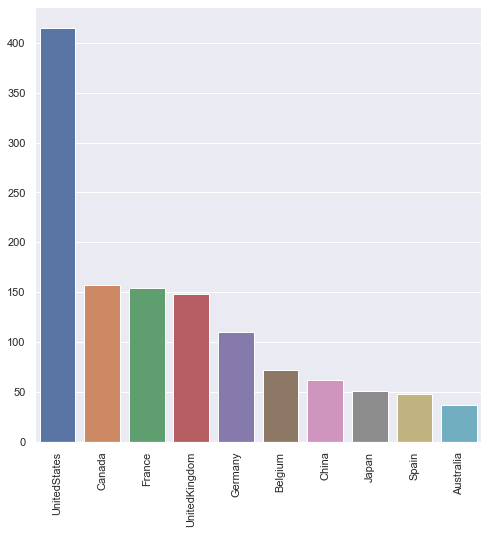

In [ ]:
# Top 10 movie content creating countries

plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[:10],
                y=list(countries_fin.values())[:10])
ax.set_xticklabels(list(countries_fin.keys())[:10], rotation=90);

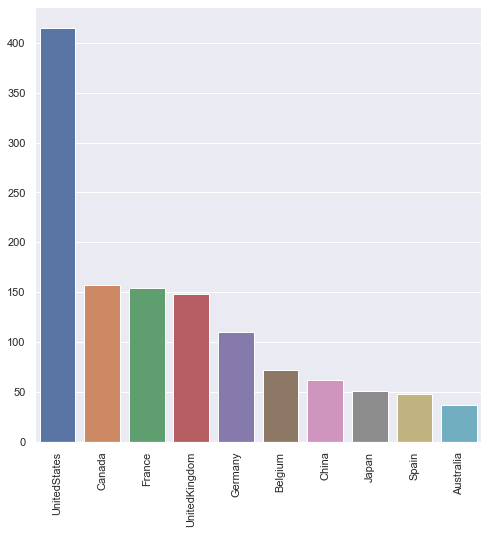

In [ ]:
# Top 10 movie content creating countries

plt.figure(figsize=(8,8))
sns.barplot(x=list(countries_fin.keys())[:10],
                y=list(countries_fin.values())[:10])
plt.xticks(rotation=90);

# Analysis of duration of movies

In [ ]:
nflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description   year     month  
0  In a future where the elite inhabit an island ...   2020    August  
1  After a devastating earthquake hits Mexico Cit...   2016  December  
2  When an army recruit is found dead, his fellow...   2018  December  
3  In a postapocalyptic world, rag-doll robots hi...   2017  November  
4  A brilliant group of students become card-coun...   2020   January

In [ ]:
nflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      5398 non-null   object
 4   cast          7059 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
 12  year          7777 non-null   object
 13  month         7777 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.2+ MB


In [ ]:
nflix['duration'] = nflix['duration'].str.replace(' min','')

In [ ]:
nflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA         93   
2  December 20, 2018          2011      R         78   
3  November 16, 2017          2009  PG-13         80   
4    January 1, 2020          2008  PG-13        123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description   year     month  
0  In a future where the elite inhabit an island ...   2020    August  
1  After a devastating earthquake hits Mexico Cit...   2016  December  
2  When an army recruit is found dead, his fellow...   2018  December  
3  In a postapocalyptic world, rag-doll robots hi...   2017  November  
4  A brilliant group of students become card-coun...   2020   January

In [ ]:
nflix['duration'].unique()

array(['4 Seasons', '93', '78', '80', '123', '1 Season', '95', '119',
       '118', '143', '103', '89', '91', '149', '144', '124', '87', '110',
       '128', '117', '100', '2 Seasons', '84', '99', '90', '102', '104',
       '105', '56', '125', '81', '97', '106', '107', '109', '44', '75',
       '101', '3 Seasons', '37', '113', '114', '130', '94', '140', '135',
       '82', '70', '121', '92', '164', '53', '83', '116', '86', '120',
       '96', '126', '129', '77', '137', '148', '28', '122', '176', '85',
       '22', '68', '111', '29', '142', '168', '21', '59', '20', '98',
       '108', '76', '26', '156', '30', '57', '150', '133', '115', '154',
       '127', '146', '136', '88', '131', '24', '112', '74', '63', '38',
       '25', '174', '60', '153', '158', '151', '162', '54', '51', '69',
       '64', '147', '42', '79', '5 Seasons', '40', '45', '172', '10',
       '163', '9 Seasons', '55', '72', '61', '71', '160', '171', '48',
       '139', '157', '15', '65', '134', '161', '62', '8 Seasons',

nflix['duration'] = nflix['duration'].str.replace(' Seasons','')

In [ ]:
nflix['duration'].unique()

array(['4 Seasons', '93', '78', '80', '123', '1 Season', '95', '119',
       '118', '143', '103', '89', '91', '149', '144', '124', '87', '110',
       '128', '117', '100', '2 Seasons', '84', '99', '90', '102', '104',
       '105', '56', '125', '81', '97', '106', '107', '109', '44', '75',
       '101', '3 Seasons', '37', '113', '114', '130', '94', '140', '135',
       '82', '70', '121', '92', '164', '53', '83', '116', '86', '120',
       '96', '126', '129', '77', '137', '148', '28', '122', '176', '85',
       '22', '68', '111', '29', '142', '168', '21', '59', '20', '98',
       '108', '76', '26', '156', '30', '57', '150', '133', '115', '154',
       '127', '146', '136', '88', '131', '24', '112', '74', '63', '38',
       '25', '174', '60', '153', '158', '151', '162', '54', '51', '69',
       '64', '147', '42', '79', '5 Seasons', '40', '45', '172', '10',
       '163', '9 Seasons', '55', '72', '61', '71', '160', '171', '48',
       '139', '157', '15', '65', '134', '161', '62', '8 Seasons',

In [ ]:
nflix[nflix['duration'].str.contains('Season')]

show_id     type                  title              director  \
0         s1  TV Show                     3%                   NaN   
5         s6  TV Show                     46           Serdar Akar   
11       s12  TV Show                   1983                   NaN   
12       s13  TV Show                   1994  Diego Enrique Osorno   
16       s17  TV Show                 Feb-09                   NaN   
...      ...      ...                    ...                   ...   
7767   s7768  TV Show     Zindagi Gulzar Hai                   NaN   
7775   s7776  TV Show             Zoids Wild                   NaN   
7777   s7778  TV Show            Zombie Dumb                   NaN   
7779   s7780  TV Show              Zona Rosa                   NaN   
7785   s7786  TV Show  Zumbo's Just Desserts                   NaN   

                                                   cast  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
5     Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...   
11    Robert Więckiewicz, Maciej Musiał, Michalina O...   
12                                                  NaN   
16    Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...   
...                                                 ...   
7767  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...   
7775  Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...   
7777                                                NaN   
7779  Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...   
7785                         Adriano Zumbo, Rachel Khoo   

                    country         date_added  release_year rating  \
0                    Brazil    August 14, 2020          2020  TV-MA   
5                    Turkey       July 1, 2017          2016  TV-MA   
11    Poland, United States  November 30, 2018          2018  TV-MA   
12                   Mexico       May 17, 2019          2019  TV-MA   
16                 Unlknown     March 20, 2019          2018  TV-14   
...                     ...                ...           ...    ...   
7767               Pakistan  December 15, 2016          2012  TV-PG   
7775                  Japan    August 14, 2020          2018  TV-Y7   
7777               Unlknown       July 1, 2019          2018  TV-Y7   
7779                 Mexico  November 26, 2019          2019  TV-MA   
7785              Australia   October 31, 2020          2019  TV-PG   

       duration                                          listed_in  \
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
5      1 Season    International TV Shows, TV Dramas, TV Mysteries   
11     1 Season  Crime TV Shows, International TV Shows, TV Dramas   
12     1 Season  Crime TV Shows, Docuseries, International TV S...   
16     1 Season                  International TV Shows, TV Dramas   
...         ...                                                ...   
7767   1 Season  International TV Shows, Romantic TV Shows, TV ...   
7775   1 Season                             Anime Series, Kids' TV   
7777  2 Seasons             Kids' TV, Korean TV Shows, TV Comedies   
7779   1 Season  International TV Shows, Spanish-Language TV Sh...   
7785   1 Season                 International TV Shows, Reality TV   

                                            description   year     month  
0     In a future where the elite inhabit an island ...   2020    August  
5     A genetics professor experiments with a treatm...   2017      July  
11    In this dark alt-history thriller, a naïve law...   2018  November  
12    Archival video and new interviews examine Mexi...   2019       May  
16    As a psychology professor faces Alzheimer's, h...   2019     March  
...                                                 ...    ...       ...  
7767  Strong-willed, middle-class Kashaf and carefre...   2016  December  
7775  A quest for freedom and legendary treasure beg...   2020    August  
7777  While living alone in a spooky town, a young g...   2019      July  
7779  An as

In [ ]:
len(nflix[nflix['duration'].str.contains('Season')])

2400

In [ ]:
x = nflix[nflix['duration'].str.contains('Season')== False]

In [ ]:
x.head()

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   
6      s7  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

          date_added  release_year rating duration  \
1  December 23, 2016          2016  TV-MA       93   
2  December 20, 2018          2011      R       78   
3  November 16, 2017          2009  PG-13       80   
4    January 1, 2020          2008  PG-13      123   
6       June 1, 2020          2019  TV-MA       95   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
6                Horror Movies, International Movies   

                                         description   year     month  
1  After a devastating earthquake hits Mexico Cit...   2016  December  
2  When an army recruit is found dead, his fellow...   2018  December  
3  In a postapocalyptic world, rag-doll robots hi...   2017  November  
4  A brilliant group of students become card-coun...   2020   January  
6  After an awful accident, a couple admitted to ...   2020      June

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 1 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5377 non-null   object
 1   type          5377 non-null   object
 2   title         5377 non-null   object
 3   director      5214 non-null   object
 4   cast          4951 non-null   object
 5   country       5377 non-null   object
 6   date_added    5377 non-null   object
 7   release_year  5377 non-null   int64 
 8   rating        5372 non-null   object
 9   duration      5377 non-null   object
 10  listed_in     5377 non-null   object
 11  description   5377 non-null   object
 12  year          5377 non-null   object
 13  month         5377 non-null   object
dtypes: int64(1), object(13)
memory usage: 630.1+ KB


In [ ]:
x['duration'] = x['duration'].astype(int)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 1 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5377 non-null   object
 1   type          5377 non-null   object
 2   title         5377 non-null   object
 3   director      5214 non-null   object
 4   cast          4951 non-null   object
 5   country       5377 non-null   object
 6   date_added    5377 non-null   object
 7   release_year  5377 non-null   int64 
 8   rating        5372 non-null   object
 9   duration      5377 non-null   int32 
 10  listed_in     5377 non-null   object
 11  description   5377 non-null   object
 12  year          5377 non-null   object
 13  month         5377 non-null   object
dtypes: int32(1), int64(1), object(12)
memory usage: 609.1+ KB


In [ ]:
sns.set(style='whitegrid')

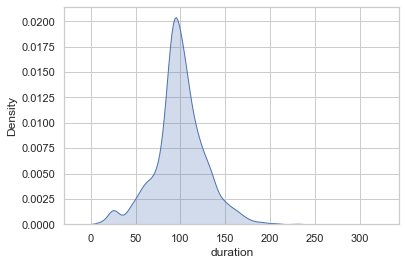

In [ ]:
sns.kdeplot(data=x['duration'], shade=True);

A good amount of movies on Netflix are having an average duration of 75-120 mins.

In [ ]:
dict(nflix['listed_in'].value_counts())

{'Documentaries': 334,
 'Stand-Up Comedy': 321,
 'Dramas, International Movies': 320,
 'Comedies, Dramas, International Movies': 243,
 'Dramas, Independent Movies, International Movies': 215,
 "Kids' TV": 204,
 'Children & Family Movies': 177,
 'Documentaries, International Movies': 172,
 'Children & Family Movies, Comedies': 169,
 'Comedies, International Movies': 161,
 'Dramas, International Movies, Romantic Movies': 153,
 'Comedies, International Movies, Romantic Movies': 139,
 'Action & Adventure, Dramas, International Movies': 117,
 'Dramas': 117,
 'International TV Shows, TV Dramas': 111,
 'Dramas, International Movies, Thrillers': 109,
 'Crime TV Shows, International TV Shows, TV Dramas': 106,
 'Comedies, Dramas, Independent Movies': 101,
 'Action & Adventure': 99,
 'Comedies': 97,
 'Dramas, Independent Movies': 94,
 "Kids' TV, TV Comedies": 89,
 'Action & Adventure, International Movies': 88,
 'International TV Shows, Romantic TV Shows, TV Dramas': 86,
 'Reality TV': 83,
 'Inte

In [ ]:
from collections import Counter

genres = list(nflix['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',''))

In [ ]:
gen

['InternationalTVShows',
 'TVDramas',
 'TVSci-Fi&Fantasy',
 'Dramas',
 'InternationalMovies',
 'HorrorMovies',
 'InternationalMovies',
 'Action&Adventure',
 'IndependentMovies',
 'Sci-Fi&Fantasy',
 'Dramas',
 'InternationalTVShows',
 'TVDramas',
 'TVMysteries',
 'HorrorMovies',
 'InternationalMovies',
 'Dramas',
 'HorrorMovies',
 'InternationalMovies',
 'HorrorMovies',
 'InternationalMovies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'CrimeTVShows',
 'InternationalTVShows',
 'TVDramas',
 'CrimeTVShows',
 'Docuseries',
 'InternationalTVShows',
 'Documentaries',
 'InternationalMovies',
 'SportsMovies',
 'IndependentMovies',
 'Sci-Fi&Fantasy',
 'Thrillers',
 'Dramas',
 'InternationalMovies',
 'Thrillers',
 'InternationalTVShows',
 'TVDramas',
 'Dramas',
 'Thrillers',
 'Comedies',
 'Dramas',
 'IndependentMovies',
 'SportsMovies',
 'Dramas',
 'IndependentMovies',
 'InternationalMovies',
 'Action&Adventure',
 'Dramas',
 'InternationalMovies',
 'Dramas',
 'InternationalMovies',
 'Dramas',
 'Int

In [ ]:
g = Counter(gen)

In [ ]:
g

Counter({'InternationalTVShows': 1198,
         'TVDramas': 703,
         'TVSci-Fi&Fantasy': 75,
         'Dramas': 2106,
         'InternationalMovies': 2437,
         'HorrorMovies': 312,
         'Action&Adventure': 721,
         'IndependentMovies': 673,
         'Sci-Fi&Fantasy': 218,
         'TVMysteries': 90,
         'Thrillers': 491,
         'CrimeTVShows': 426,
         'Docuseries': 352,
         'Documentaries': 786,
         'SportsMovies': 196,
         'Comedies': 1471,
         'AnimeSeries': 147,
         'RealityTV': 222,
         'TVComedies': 518,
         'RomanticMovies': 531,
         'RomanticTVShows': 333,
         'Science&NatureTV': 85,
         'Movies': 56,
         'BritishTVShows': 231,
         'KoreanTVShows': 150,
         'Music&Musicals': 321,
         'LGBTQMovies': 90,
         'Faith&Spirituality': 57,
         "Kids'TV": 412,
         'TVAction&Adventure': 149,
         'Spanish-LanguageTVShows': 146,
         'Children&FamilyMovies': 532,
   

In [ ]:
l = ['Darshan', 'Surya', 'Darshan', 'Jagdeep', 'Jagdeep', 'Darshan']
cnt_l = Counter(l)
cnt_l

Counter({'Darshan': 3, 'Surya': 1, 'Jagdeep': 2})

In [ ]:
g = dict(g)

In [ ]:
g

{'InternationalTVShows': 1198,
 'TVDramas': 703,
 'TVSci-Fi&Fantasy': 75,
 'Dramas': 2106,
 'InternationalMovies': 2437,
 'HorrorMovies': 312,
 'Action&Adventure': 721,
 'IndependentMovies': 673,
 'Sci-Fi&Fantasy': 218,
 'TVMysteries': 90,
 'Thrillers': 491,
 'CrimeTVShows': 426,
 'Docuseries': 352,
 'Documentaries': 786,
 'SportsMovies': 196,
 'Comedies': 1471,
 'AnimeSeries': 147,
 'RealityTV': 222,
 'TVComedies': 518,
 'RomanticMovies': 531,
 'RomanticTVShows': 333,
 'Science&NatureTV': 85,
 'Movies': 56,
 'BritishTVShows': 231,
 'KoreanTVShows': 150,
 'Music&Musicals': 321,
 'LGBTQMovies': 90,
 'Faith&Spirituality': 57,
 "Kids'TV": 412,
 'TVAction&Adventure': 149,
 'Spanish-LanguageTVShows': 146,
 'Children&FamilyMovies': 532,
 'TVShows': 12,
 'ClassicMovies': 103,
 'CultMovies': 59,
 'TVHorror': 69,
 'Stand-UpComedy&TalkShows': 52,
 'TeenTVShows': 60,
 'Stand-UpComedy': 329,
 'AnimeFeatures': 57,
 'TVThrillers': 50,
 'Classic&CultTV': 25}

In [ ]:
d = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse=True)}
d

{'InternationalMovies': 2437,
 'Dramas': 2106,
 'Comedies': 1471,
 'InternationalTVShows': 1198,
 'Documentaries': 786,
 'Action&Adventure': 721,
 'TVDramas': 703,
 'IndependentMovies': 673,
 'Children&FamilyMovies': 532,
 'RomanticMovies': 531,
 'TVComedies': 518,
 'Thrillers': 491,
 'CrimeTVShows': 426,
 "Kids'TV": 412,
 'Docuseries': 352,
 'RomanticTVShows': 333,
 'Stand-UpComedy': 329,
 'Music&Musicals': 321,
 'HorrorMovies': 312,
 'BritishTVShows': 231,
 'RealityTV': 222,
 'Sci-Fi&Fantasy': 218,
 'SportsMovies': 196,
 'KoreanTVShows': 150,
 'TVAction&Adventure': 149,
 'AnimeSeries': 147,
 'Spanish-LanguageTVShows': 146,
 'ClassicMovies': 103,
 'TVMysteries': 90,
 'LGBTQMovies': 90,
 'Science&NatureTV': 85,
 'TVSci-Fi&Fantasy': 75,
 'TVHorror': 69,
 'TeenTVShows': 60,
 'CultMovies': 59,
 'Faith&Spirituality': 57,
 'AnimeFeatures': 57,
 'Movies': 56,
 'Stand-UpComedy&TalkShows': 52,
 'TVThrillers': 50,
 'Classic&CultTV': 25,
 'TVShows': 12}

# WordCloud for genres

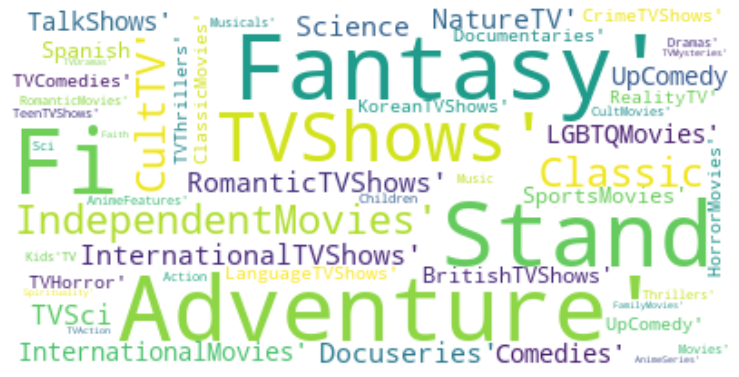

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))

plt.rcParams['figure.figsize'] = (13,13)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

# Lollipop plot of Genres vs their count on Netflix

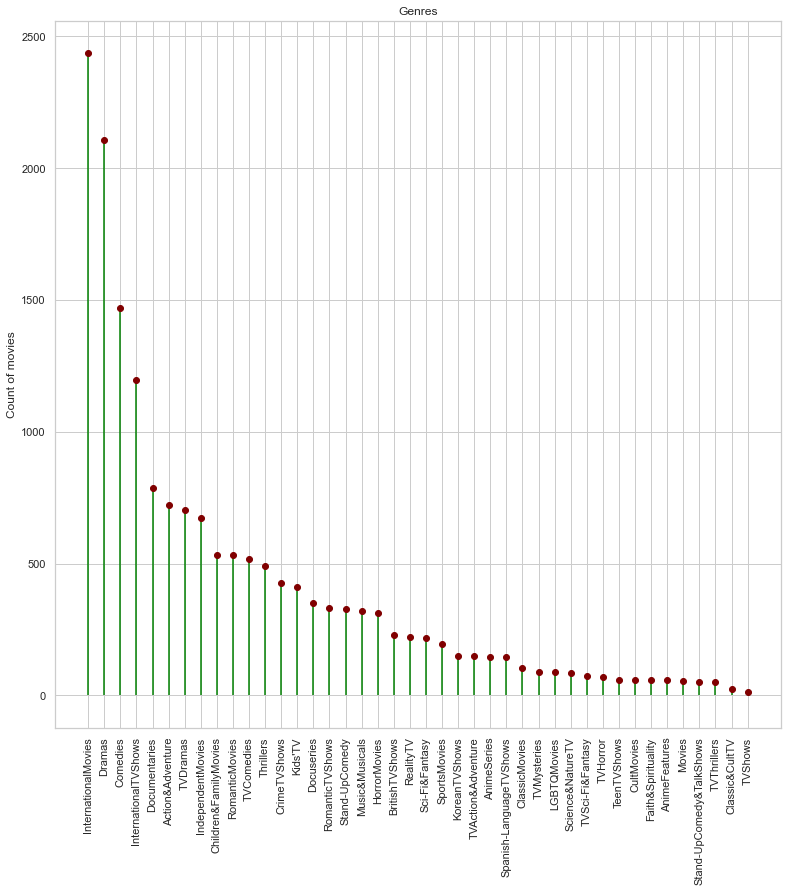

<Figure size 720x720 with 0 Axes>

In [ ]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

# Analysis of TV Series on Netflix

In [ ]:
countries1={}
nflix['country']=nflix['country'].fillna('Unknown')
cou1=list(nflix['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

In [ ]:
countries1

{'Brazil': 1,
 'Mexico': 1,
 'Singapore': 1,
 'United States': 1,
 'Turkey': 1,
 'Egypt': 1,
 'India': 1,
 'Poland': 1,
 ' United States': 414,
 'Thailand': 1,
 'Nigeria': 1,
 'Unlknown': 1,
 'Norway': 2,
 ' Iceland': 4,
 'United Kingdom': 2,
 'Japan': 1,
 'South Korea': 1,
 'Italy': 2,
 'Canada': 4,
 'Indonesia': 1,
 'Romania': 3,
 'Spain': 1,
 'Iceland': 1,
 'South Africa': 1,
 ' Nigeria': 5,
 'France': 1,
 ' South Africa': 19,
 'Portugal': 2,
 ' Spain': 47,
 'Hong Kong': 1,
 ' China': 61,
 ' Singapore': 11,
 ' Germany': 107,
 'Argentina': 3,
 ' France': 153,
 ' Serbia': 4,
 'Germany': 3,
 'Denmark': 1,
 ' Poland': 10,
 'Kenya': 2,
 'New Zealand': 2,
 ' United Kingdom': 146,
 'Pakistan': 1,
 'Australia': 1,
 'China': 1,
 ' Hong Kong': 25,
 'Taiwan': 1,
 ' South Korea': 18,
 ' Japan': 50,
 ' Canada': 153,
 'Netherlands': 1,
 ' Denmark': 14,
 ' Netherlands': 20,
 'Philippines': 1,
 'United Arab Emirates': 2,
 'Iran': 1,
 ' Belgium': 71,
 ' Brazil': 9,
 'Israel': 1,
 ' Mexico': 31,
 'Ur

In [ ]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

In [ ]:
countries_fin1

{'UnitedStates': 415,
 'Canada': 157,
 'France': 154,
 'UnitedKingdom': 148,
 'Germany': 110,
 'Belgium': 72,
 'China': 62,
 'Japan': 51,
 'Spain': 48,
 'Australia': 37,
 'India': 35,
 'Italy': 33,
 'Mexico': 32,
 'HongKong': 26,
 'Sweden': 25,
 'Netherlands': 21,
 'SouthAfrica': 20,
 'CzechRepublic': 20,
 'SouthKorea': 19,
 'Argentina': 17,
 'UnitedArabEmirates': 17,
 'Denmark': 15,
 'NewZealand': 15,
 'Ireland': 15,
 'Singapore': 12,
 'Switzerland': 12,
 'Poland': 11,
 'Norway': 11,
 'Luxembourg': 11,
 'Finland': 11,
 'Brazil': 10,
 'Colombia': 10,
 'Greece': 10,
 'Chile': 9,
 'Russia': 9,
 'Israel': 8,
 'Lebanon': 8,
 'Jordan': 8,
 'Serbia': 7,
 'Uruguay': 7,
 'Qatar': 7,
 'Egypt': 6,
 'Nigeria': 6,
 'Peru': 6,
 'Hungary': 6,
 'Morocco': 6,
 'Thailand': 5,
 'Iceland': 5,
 'Indonesia': 5,
 'Romania': 5,
 'Bulgaria': 5,
 'WestGermany': 5,
 'Portugal': 4,
 'Kenya': 4,
 'Taiwan': 4,
 'Philippines': 4,
 'Iran': 4,
 'Malaysia': 4,
 'Austria': 4,
 '': 4,
 'Cambodia': 4,
 'Croatia': 4,
 'Tu

# Most Content Creating Countries

<AxesSubplot:title={'center':'Content Creating Countries'}>

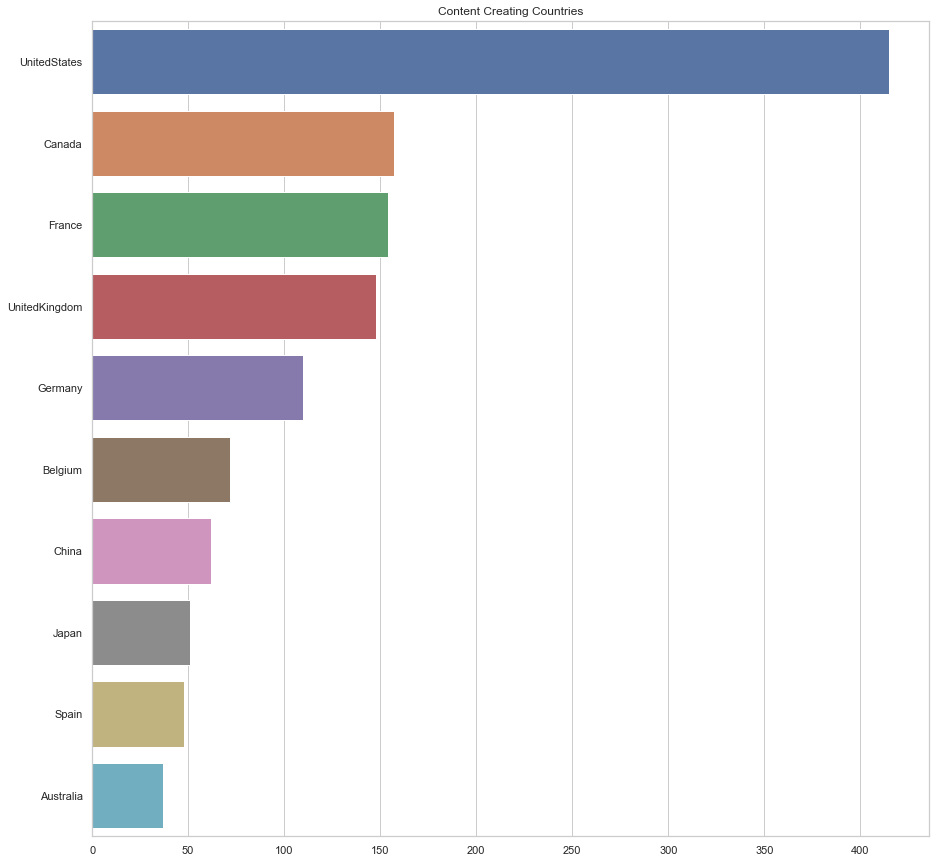

In [ ]:
plt.figure(figsize=(15,15))

plt.title("Content Creating Countries")

# Bar chart
sns.barplot(y=list(countries_fin1.keys())[:10], x=list(countries_fin1.values())[:10])


US has the most content that is created for Netflix in TV shows category.

# TV shows with largest number of seasons

In [ ]:
features = ['title','duration']
durations = nflix[features]

In [ ]:
durations.head()

title   duration
0     3%  4 Seasons
1   7:19         93
2  23:59         78
3      9         80
4     21        123

In [ ]:
x = durations[durations['duration'].str.contains('Season')]

In [ ]:
x.head()

title   duration
0       3%  4 Seasons
5       46   1 Season
11    1983   1 Season
12    1994   1 Season
16  Feb-09   1 Season

In [ ]:
x['duration'].value_counts()

1 Season      1608
2 Seasons      378
3 Seasons      183
4 Seasons       86
5 Seasons       57
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       5
15 Seasons       2
12 Seasons       2
11 Seasons       2
16 Seasons       1
13 Seasons       1
Name: duration, dtype: int64

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 7785
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2400 non-null   object
 1   duration  2400 non-null   object
dtypes: object(2)
memory usage: 56.2+ KB


In [ ]:
x['duration'] = x['duration'].str.replace(' Season','')

In [ ]:
x.head()

title duration
0       3%       4s
5       46        1
11    1983        1
12    1994        1
16  Feb-09        1

In [ ]:
x['duration'] = x['duration'].str.strip('s')

In [ ]:
list(x['duration'].values)

['4',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '4',
 '3',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '3',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '3',
 '1',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '4',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '5',
 '1',
 '1',
 '1',
 '5',
 '2',
 '2',
 '1',
 '1',
 '2',
 '3',
 '1',
 '1',
 '9',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '3',
 '1',
 '1',
 '1',
 '3',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '5',
 '8',
 '1',
 '3',
 '1',
 '1',
 '3',
 '1',
 '1',
 '1',
 '1',
 '1',
 '3',
 '1',
 '1',
 '1',
 '3',
 '1',
 '1',
 '1',
 '1',
 '2',
 '3',
 '2',
 '3',
 '1',
 '1',
 '1',
 '2',
 '1',
 '3',
 '1',
 '1',
 '1',
 '1',
 '3',
 '1'

In [ ]:
x['duration'] = x['duration'].astype(int)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 7785
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2400 non-null   object
 1   duration  2400 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 46.9+ KB


In [ ]:
x.head()

title  duration
0       3%         4
5       46         1
11    1983         1
12    1994         1
16  Feb-09         1

In [ ]:
t = x.sort_values(by='duration',ascending=False)

In [ ]:
t.head(10)

title  duration
2538                    Grey's Anatomy        16
5912                      Supernatural        15
4438                              NCIS        15
1471            COMEDIANS of the world        13
1537                    Criminal Minds        12
7169                 Trailer Park Boys        12
2678                         Heartland        11
1300                            Cheers        11
1597  Danger Mouse: Classic Collection        10
5538                  Shameless (U.S.)        10

In [ ]:
top20 = t[:20]
top20

title  duration
2538                      Grey's Anatomy        16
5912                        Supernatural        15
4438                                NCIS        15
1471              COMEDIANS of the world        13
1537                      Criminal Minds        12
7169                   Trailer Park Boys        12
2678                           Heartland        11
1300                              Cheers        11
1597    Danger Mouse: Classic Collection        10
5538                    Shameless (U.S.)        10
5795                       Stargate SG-1        10
1577                          Dad's Army        10
3592  LEGO Ninjago: Masters of Spinjitzu        10
6983                    The Walking Dead         9
2237                      Forensic Files         9
4404                              Naruto         9
1181                    Call the Midwife         9
6718                   The Office (U.S.)         9
5818                          Still Game         9
1431            Club Friday The Series 6         9

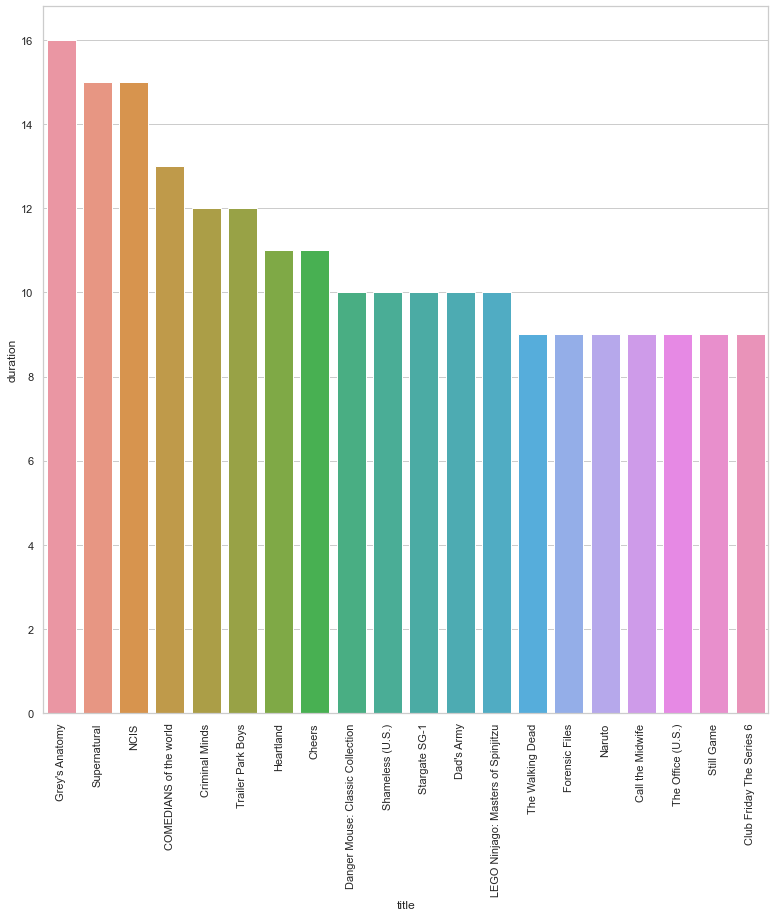

In [ ]:
plt.figure()
sns.barplot(x='title', y='duration',data=top20)
plt.xticks(rotation=90)
plt.show();

# Lowest number of seasons

In [ ]:
bottom20 = t.tail(30)
bottom20

title  duration
3418                                    Kitten Rescuers         1
3519                        Lady, la vendedora de rosas         1
3531           Larry Charles' Dangerous World of Comedy         1
3536                                               Last         1
609                                  At the Dolphin Bay         1
3630                                  Life Plan A and B         1
3628                                   Life on Location         1
3621                                               Life         1
3619                        License to Drill: Louisiana         1
3612                                             Levius         1
3611                                          Let’s Eat         1
3610                                        Let's Eat 2         1
3600                                          Leo & Tig         1
3598                                         Lenox Hill         1
3596                                              Leila         1
3594                              LEGO: CITY Adventures         1
3586                LEGO Jurassic World: Secret Exhibit         1
615                                       Atomic Puppet         1
3585         LEGO Jurassic World: Legend of Isla Nublar         1
3582                   Lego Friends: Girls on a Mission         1
3580                   LEGO Elves: Secrets of Elvendale         1
3575                                Legends of Strength         1
3573                      Legend Quest: Masters of Myth         1
3572                                       Legend Quest         1
3564                           Learning Time with Timmy         1
3563  Learning Songs by Little Baby Bum: Nursery Rhy...         1
3550                                 Laws of Attraction         1
3548                                           Lavender         1
610                                             Atelier         1
7785                              Zumbo's Just Desserts         1

In [ ]:
nflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA         93   
2  December 20, 2018          2011      R         78   
3  November 16, 2017          2009  PG-13         80   
4    January 1, 2020          2008  PG-13        123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description   year     month  
0  In a future where the elite inhabit an island ...   2020    August  
1  After a devastating earthquake hits Mexico Cit...   2016  December  
2  When an army recruit is found dead, his fellow...   2018  December  
3  In a postapocalyptic world, rag-doll robots hi...   2017  November  
4  A brilliant group of students become card-coun...   2020   January

In [ ]:
nflix['country'].value_counts()

United States                             2549
India                                      923
Unlknown                                   506
United Kingdom                             396
Japan                                      225
                                          ... 
Turkey, India                                1
United States, France, Serbia                1
France, United States, Canada                1
United Kingdom, United States, Morocco       1
United States, Norway, Canada                1
Name: country, Length: 682, dtype: int64

In [ ]:
countries_fin

{'UnitedStates': 415,
 'Canada': 157,
 'France': 154,
 'UnitedKingdom': 148,
 'Germany': 110,
 'Belgium': 72,
 'China': 62,
 'Japan': 51,
 'Spain': 48,
 'Australia': 37,
 'India': 35,
 'Italy': 33,
 'Mexico': 32,
 'HongKong': 26,
 'Sweden': 25,
 'Netherlands': 21,
 'SouthAfrica': 20,
 'CzechRepublic': 20,
 'SouthKorea': 19,
 'Argentina': 17,
 'UnitedArabEmirates': 17,
 'Denmark': 15,
 'NewZealand': 15,
 'Ireland': 15,
 'Singapore': 12,
 'Switzerland': 12,
 'Poland': 11,
 'Norway': 11,
 'Luxembourg': 11,
 'Finland': 11,
 'Brazil': 10,
 'Colombia': 10,
 'Greece': 10,
 'Chile': 9,
 'Russia': 9,
 'Israel': 8,
 'Lebanon': 8,
 'Jordan': 8,
 'Serbia': 7,
 'Uruguay': 7,
 'Qatar': 7,
 'Egypt': 6,
 'Nigeria': 6,
 'Peru': 6,
 'Hungary': 6,
 'Morocco': 6,
 'Thailand': 5,
 'Iceland': 5,
 'Indonesia': 5,
 'Romania': 5,
 'Bulgaria': 5,
 'WestGermany': 5,
 'Portugal': 4,
 'Kenya': 4,
 'Taiwan': 4,
 'Philippines': 4,
 'Iran': 4,
 'Malaysia': 4,
 'Austria': 4,
 '': 4,
 'Cambodia': 4,
 'Croatia': 4,
 'Tu

# Content in India

In [ ]:
nflix[nflix['country']=='India']

show_id   type                     title            director  \
8         s9  Movie                       706       Shravan Kumar   
9        s10  Movie                      1920        Vikram Bhatt   
18       s19  Movie                    15-Aug  Swapnaneel Jayakar   
20       s21  Movie      ​​Kuch Bheege Alfaaz                Onir   
21       s22  Movie              ​Goli Soda 2        Vijay Milton   
...      ...    ...                       ...                 ...   
7764   s7765  Movie                      Zero          Aanand Rai   
7769   s7770  Movie  Zindagi Na Milegi Dobara         Zoya Akhtar   
7776   s7777  Movie                  Zokkomon    Satyajit Bhatkal   
7780   s7781  Movie                       Zoo        Shlok Sharma   
7783   s7784  Movie                    Zubaan         Mozez Singh   

                                                   cast country  \
8     Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...   India   
9     Rajneesh Duggal, Adah Sharma, Indraneil Sengup...   India   
18    Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...   India   
20    Geetanjali Thapa, Zain Khan Durrani, Shray Rai...   India   
21    Samuthirakani, Bharath Seeni, Vinoth, Esakki B...   India   
...                                                 ...     ...   
7764  Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...   India   
7769  Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...   India   
7776  Darsheel Safary, Anupam Kher, Manjari Fadnis, ...   India   
7780  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...   India   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   India   

              date_added  release_year rating duration  \
8          April 1, 2019          2019  TV-14      118   
9      December 15, 2017          2008  TV-MA      143   
18        March 29, 2019          2019  TV-14      124   
20     September 1, 2018          2018  TV-14      110   
21    September 15, 2018          2018  TV-14      128   
...                  ...           ...    ...      ...   
7764        May 21, 2019          2018  TV-14      159   
7769   December 15, 2019          2011  TV-14      154   
7776    November 1, 2018          2011     PG      104   
7780        July 1, 2018          2018  TV-MA       94   
7783       March 2, 2019          2015  TV-14      111   

                                             listed_in  \
8                  Horror Movies, International Movies   
9       Horror Movies, International Movies, Thrillers   
18                Comedies, Dramas, Independent Movies   
20    Dramas, Independent Movies, International Movies   
21    Action & Adventure, Dramas, International Movies   
...                                                ...   
7764            Comedies, Dramas, International Movies   
7769            Comedies, Dramas, International Movies   
7776                  Children & Family Movies, Dramas   
7780  Dramas, Independent Movies, International Movies   
7783    Dramas, International Movies, Music & Musicals   

                                            description   year      month  
8     When a doctor goes missing, his psychiatrist w...   2019      April  
9     An architect and his wife move into a castle t...   2017   December  
18    On India's Independence Day, a zany mishap in ...   2019      March  
20    After accidentally connecting over the Interne...   2018  September  
21    A taxi driver, a gangster and an athlete strug...   2018  September  
...                                                 ...    ...        ...  
7764  Through his relationships with two wildly diff...   2019        May  
7769  Three friends on an adventurous road trip/bach...   2019   December  
7776  When his cruel uncle abandons him, a young orp...   2018   November  
7780  A drug dealer starts having doubts about his t...   2018       July  
7783  A scrappy but poor boy worms his way into a ty...   2019      March  

[923 rows x 14 columns]

In [ ]:
india = nflix[nflix['country']=='India']

In [ ]:
india.isna().sum()

show_id          0
type             0
title            0
director        75
cast            29
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
year             0
month            0
dtype: int64

In [ ]:
india.dropna(inplace=True)

In [ ]:
india.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year            0
month           0
dtype: int64

In [ ]:
import plotly.express as px

fig = px.treemap(india, path=['country','director'],
                color='director',
                 hover_data=['director','title']
                )
fig.show();